## 5.02 Into to Scikit Learn
1. choose model class
    - ```from sklearn.QQQ import ZZZ```   
2. instantiate model
    - ```model = ZZZ()```                   
3. fit model to data
    - ```model.fit(Xtrain, ytrain)```   
4. predict on new data
    - ```y_model = model.predict(Xtest)```  
    
Split into train and test sets <br>
```from sklearn.model_selection import train_test_split```


In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

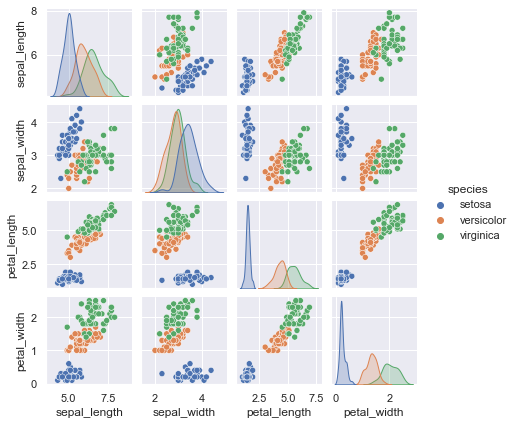

In [14]:
iris = sns.load_dataset('iris')
iris.head()
sns.pairplot(iris, hue = 'species', height = 1.5)

In [7]:
X_iris = iris.drop('species', axis = 1)
y_iris = iris['species']

###  Simple Linear Regression
- ```model = LinearRegression(fit_intercept=True)```
- ```model.fit, model.predict```

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


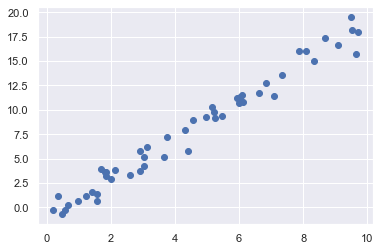

In [28]:
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x - 1 + rng.randn(50)
plt.scatter(x,y);

(50, 1)

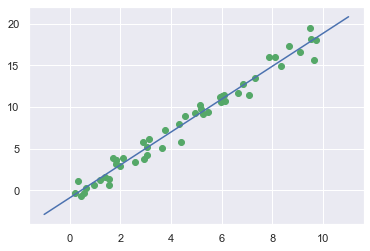

In [50]:
# specify that intecept needs to be fit
model = LinearRegression(fit_intercept=True)

# arrange data into feature matrix and target vector
# x is an array, so convert into a (Mx1) matrix since there is only one feature
X = x[:, np.newaxis]
display(X.shape)

# Fit model and see results
model.fit(X,y)
model.coef_ , model.intercept_

# predict results on new data
xfit = np.linspace(-1,11)
Xfit = xfit[:, np.newaxis]  # convert into 1 col matrix
yfit = model.predict(Xfit)

# plot results
plt.scatter(x,y, color = 'g')
plt.plot(xfit, yfit)

### Classification
- Simple naive bayes classification

In [55]:
# note that import syntax is diff from that in the book
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

# 75:25 split ratio.... can change that by train_size = 0.8

In [60]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data


In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

###  Principal component analysis

In [62]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


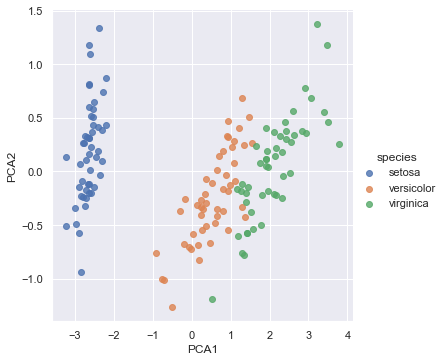

In [79]:
# plot the results
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = "PCA1", 
           y = "PCA2", 
           hue='species', 
           data=iris,
           fit_reg=False);

### Clustering

In [83]:
# Note that the import syntax is diff from that in the book
# https://stackoverflow.com/questions/55799601/problem-with-gmm-library-from-sklear-mixture/59292632

from sklearn import mixture          # 1. Choose the model class
model = mixture.GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

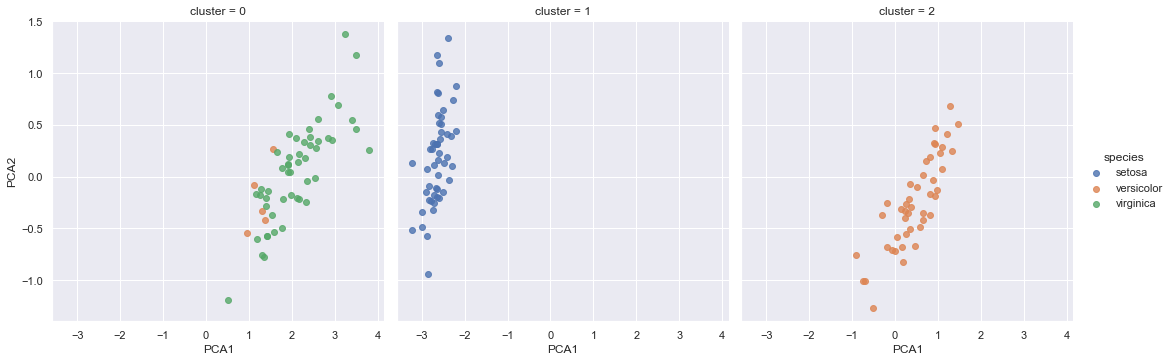

In [85]:
# plot results
iris['cluster'] = y_gmm
sns.lmplot(x = "PCA1", y = "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

###  Example with PCA on hand written digits

## 5.03 Hyperparameters and model validation
- ```from sklearn.neighbors import KNeighborsClassifier```
- ```from sklearn.model_selection import cross_val_score``` cross validation
- ```from sklearn.learning_curve import validation_curve``` validaton curve
- ```from sklearn.learning_curve import learning_curve``` learning curve
- ```from sklearn.grid_search import GridSearchCV``` grid search
    - Takes in 3 parameters: poly degree, intercept fit or not, normalize or not

In [128]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1) # specify model

#model.fit(X_iris, y_iris) # fit the model to entire X,y

from sklearn.model_selection import cross_val_score
cross_val_score(model, X_iris, y_iris, cv = 10) # cross validation 5 fold

# note that cv = 100 or higher doesn't work since it tries to keep the proportion of the classes the same in each fold


array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])

## 5.04 Feature Engineerig
- Convert factors into matrix with 0/1... sparse = True for many 0s <br>
    - ```from sklearn.feature_extraction import DictVectorizer
       vec = DictVectorizer(sparse=False, dtype=int)
       vec.fit_transform(data)``` <br>
    - ```sklearn.preprocessing.OneHotEncoder and 
       sklearn.feature_extraction.FeatureHasher``` other tools
- Text Features
- Image Features
- Derived Features
- Missing data
    - ```from sklearn.preprocessing import Imputer
       imp = Imputer(strategy='mean')
       X2 = imp.fit_transform(X)```

## 5.06 Linear Regression
- Refer 5.02
- Polynomial regression 
    - ```poly = PolynomialFeatures(3)``` to convert simple x array into matrix with powers
    - ```poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())``` to transform aply regression in one step
- Interaction terms - 
https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions


In [134]:
# Multiple linear reg
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

# used to get the same randome values for reproducibility
rng = np.random.RandomState(1)

# 3D array with columns as x1, x2, x3
X = 10 * rng.rand(100, 3)

# y = 1.5*x1 - 0.2*x2 + 1*x3
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000064
[ 1.5 -2.   1. ]


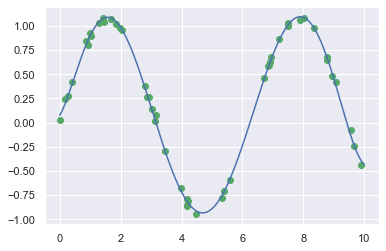

In [158]:
# Polynomial Regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

# make data
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = np.sin(x) + 0.1*rng.rand(50)

poly_model.fit(x[:, np.newaxis], y) # converting the x into a column matrix
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y, color = 'g')
plt.plot(xfit, yfit)


In [162]:
# what exactly is Polynomial features doing
# It takes the x values and transforms it into a matrix with columns corresponding to x, x^2, X^3....
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

# Col1 = x
# Col2 = x^2
# Col3 = x^3

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

###  Example with mtcars dataset using ```statsmodels```
- ```import statsmodels.api as sm```
- ```import statsmodels.formula.api as smf``` uses R type formula

In [196]:
mtcars = pd.read_csv("./data/mtcars.csv", index_col = 0)
mtcars.head()
# mtcars.columns
# mtcars.index
# mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


(array([2., 4., 6., 6., 5., 3., 1., 1., 2., 2.]),
 array([10.4 , 12.75, 15.1 , 17.45, 19.8 , 22.15, 24.5 , 26.85, 29.2 ,
        31.55, 33.9 ]),
 <BarContainer object of 10 artists>)

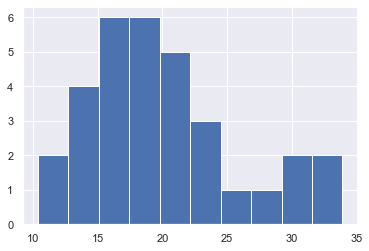

In [197]:
plt.hist(mtcars.mpg)

Text(0, 0.5, 'mpg')

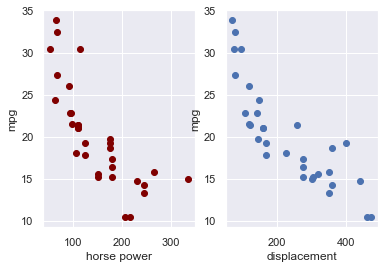

In [194]:
plt.subplot(1,2,1)
plt.scatter(mtcars.hp, mtcars.mpg, color = "maroon")
plt.xlabel("horse power")
plt.ylabel("mpg")

plt.subplot(1,2,2)
plt.scatter(mtcars.disp, mtcars.mpg)
plt.xlabel("displacement")
plt.ylabel("mpg")


Text(0, 0.5, 'mpg')

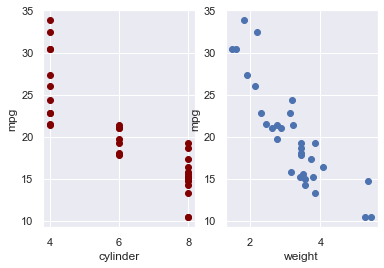

In [193]:
plt.subplot(1,2,1)
plt.scatter(mtcars.cyl, mtcars.mpg, color = "maroon")
plt.xlabel("cylinder")
plt.ylabel("mpg")

plt.subplot(1,2,2)
plt.scatter(mtcars.wt, mtcars.mpg)
plt.xlabel("weight")
plt.ylabel("mpg")


In [206]:
# using basic sm package
y = mtcars.mpg
X = mtcars[['cyl', 'hp']]
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.42
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           3.16e-09
Time:                        20:26:02   Log-Likelihood:                -80.781
No. Observations:                  32   AIC:                             167.6
Df Residuals:                      29   BIC:                             172.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9083      2.191     16.847      0.000      32.428      41.389
cyl           -2.2647      0.576     -3.933      0.000      -3.443      -1.087
hp            -0.0191      0.015     -1.275      0.213      -0.050       0.012
==============================================================================
Omnibus:                        1.178   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                1.092
Skew:                           0.411   Prob(JB):                        0.579
Kurtosis:                       2.623   Cond. No.                         645.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
# using R-tyoe smf package
model = smf.ols(formula = 'mpg ~ cyl + disp', data = mtcars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.06e-09
Time:                        20:36:57   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Logistic Regression